2019-02-03
2019-02-04


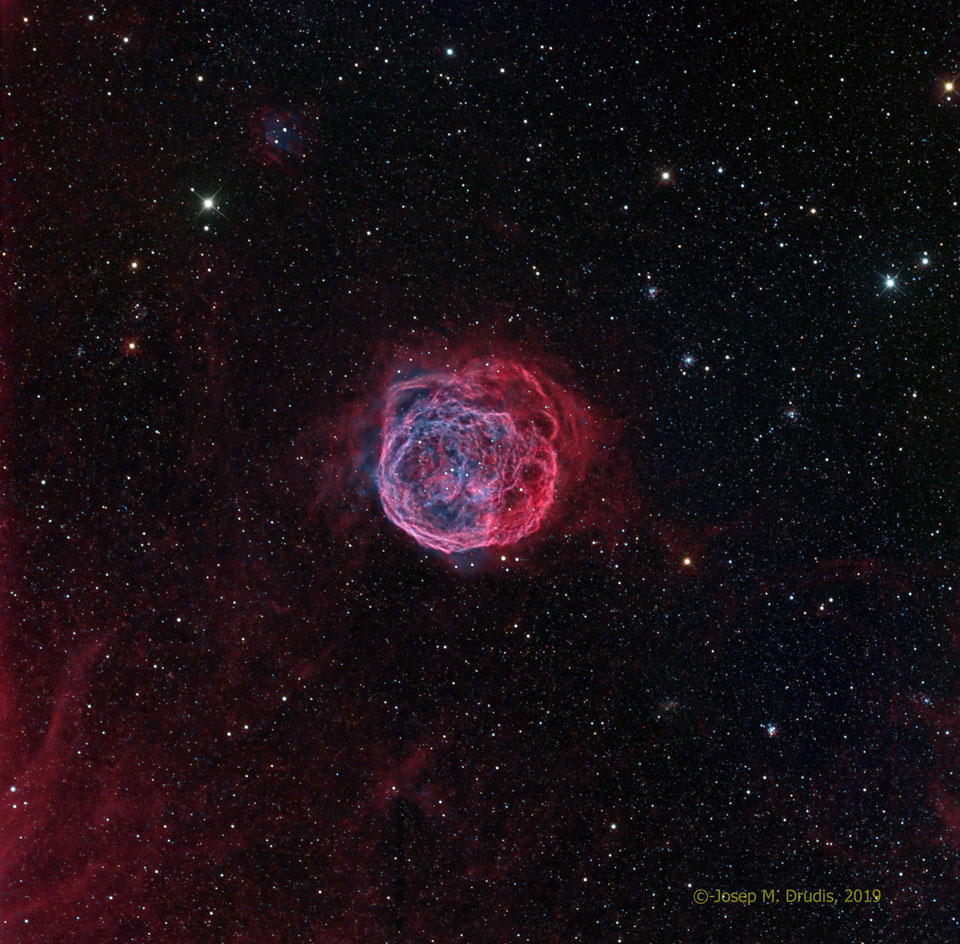

KeyboardInterrupt: 

In [23]:
import requests
import time
import os
from urllib.parse import urlparse
from IPython import display
# This program will run a slideshow of pictures from NASA's Astronomy
# Picture of the Day API. The photos are on an endless loop starting from
# February 1st, 2019 to February 28th.
date = "2019-02-01"
def updateDate(date):
    new = date.split('-')
    new[2] = int(new[2]) + 1
    if new[2] < 10:
        new[2] = str(new[2])
        new[2] = '0' + new[2]
    elif new[2] > 28:
        new[2] = '01'
    else: new[2] = str(new[2])
    date = '-'.join(new)
    return date

def updateUrl(date):
    api_key = "gck2cYzM4JYOEitHlSv452ccH7npEdM6b9eGt99y"
    url = f'https://api.nasa.gov/planetary/apod?api_key={api_key}&date={date}'
    response = requests.get(url)
    image_url = response.json()['url']
    return image_url

# Only pictures with the .jpg file extension are displayed. 
# Youtube videos and other file types are omitted.
while True:
    date = updateDate(date)
    image_url = updateUrl(date)
    path = urlparse(image_url).path
    ext = os.path.splitext(path)[1]
    if ext == ".jpg":
        display.display(display.Image(image_url))  
        time.sleep(1)
        display.clear_output()

